# Decision Tree Classification

## 1. Importing Packages

In [1]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.datasets import load_breast_cancer
from prettytable import PrettyTable

from modelviz_functions import *

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

## 2. Data Loading and Preparation

In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

# Get column names for features and target
feature_names = data.feature_names
target_names = data.target_names

# Combine feature matrix X and target vector y into a single array
data_array = pd.concat([pd.DataFrame(X, columns=feature_names), pd.DataFrame(y, columns=['target'])], axis=1)

# Convert array to pandas DataFrame
df = pd.DataFrame(data_array)

# Print the first 5 rows of the DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry   
0        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001              0.14710         0.2419                 0.07871        1.0950         0.9053            8.589      153.40          0.006399            0.04904          0.05373               0.01587         0.03003                 0.006193         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119                0.2654          0.4601  \
1        2

## 3. Modeling using CART

### 3.1. without tuning HyperParameters

         - Model Evaluation for DTR without tuning HyperParameters -


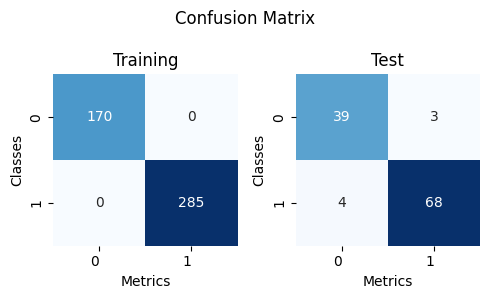

                       - Performance Summary -
+----------+----------+---------------+-----------+--------+----------+
| Dataset  | Accuracy | ROC AUC Score | Precision | Recall | F1 Score |
+----------+----------+---------------+-----------+--------+----------+
| Training |   1.00   |      1.00     |    1.00   |  1.00  |   1.00   |
|   Test   |   0.94   |      0.94     |    0.96   |  0.94  |   0.95   |
+----------+----------+---------------+-----------+--------+----------+


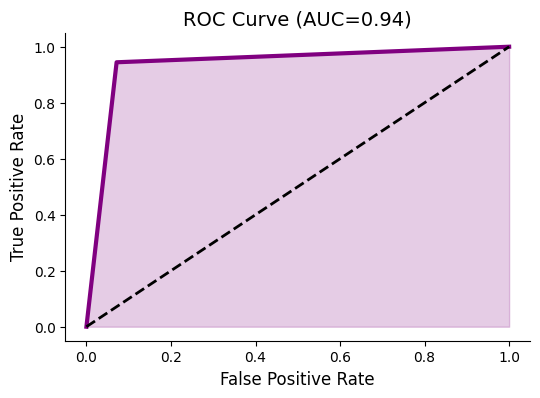

In [5]:
y = df["target"]
X = df.drop(["target"], axis=1)

# Split the data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28, stratify=y)


dtc = DecisionTreeClassifier(random_state=28)

dtc_model_default = dtc.fit(X_train, y_train)

# Train
y_pred_train_def = dtc_model_default.predict(X_train)
y_prob_train_def = dtc_model_default.predict_proba(X_train)[:, 1]

# Test
y_pred_test_def = dtc_model_default.predict(X_test)
y_prob_test_def = dtc_model_default.predict_proba(X_test)[:, 1]

print(8*' ','-','Model Evaluation for DTR without tuning HyperParameters','-' )

model_perfomance_plot(y_train, y_pred_train_def, y_prob_train_def, y_test,  y_pred_test_def, y_prob_test_def)

roc_auc_curve_plot(y_test, y_prob_test_def)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


      - Model Evaluation for DTR after tuning HyperParameters -


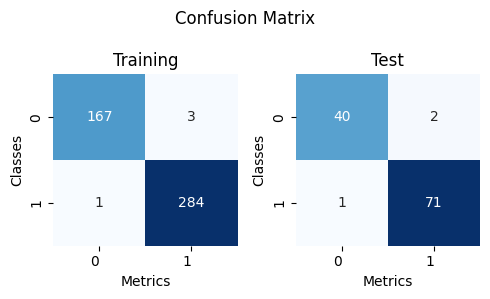

                       - Performance Summary -
+----------+----------+---------------+-----------+--------+----------+
| Dataset  | Accuracy | ROC AUC Score | Precision | Recall | F1 Score |
+----------+----------+---------------+-----------+--------+----------+
| Training |   0.99   |      1.00     |    0.99   |  1.00  |   0.99   |
|   Test   |   0.97   |      0.97     |    0.97   |  0.99  |   0.98   |
+----------+----------+---------------+-----------+--------+----------+


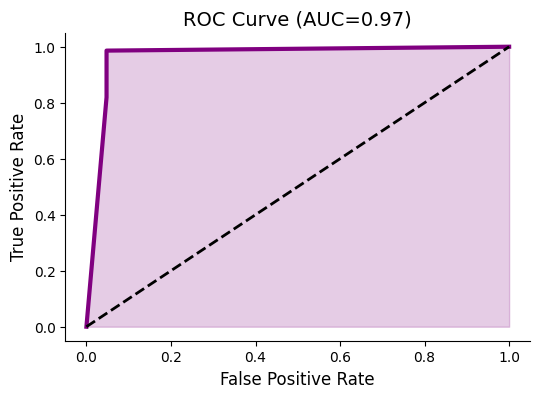

In [9]:
dtc = DecisionTreeClassifier(random_state=28)

dtc_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

dtc_best_grid = GridSearchCV(dtc,
                              dtc_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X_train, y_train)

dtc_model_grid = DecisionTreeClassifier(**dtc_best_grid.best_params_, random_state=28).fit(X_train, y_train)



y_pred_train_grid = dtc_model_grid.predict(X_train)
y_prob_train_grid = dtc_model_grid.predict_proba(X_train)[:, 1]

y_pred_test_grid = dtc_model_grid.predict(X_test)
y_prob_test_grid = dtc_model_grid.predict_proba(X_test)[:, 1]



print('\n\n', 4*' ','-','Model Evaluation for DTR after tuning HyperParameters','-' )

model_perfomance_plot(y_train, y_pred_train_grid, y_prob_train_grid, y_test,  y_pred_test_grid, y_prob_test_grid)

roc_auc_curve_plot(y_test, y_prob_test_grid)